In [18]:
import tensorflow as tf

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [22]:
from sklearn.utils import shuffle

In [23]:
#utworze teraz dane jakies
def kolko_w_kolku(sig1=0.4,sig2=0.6,R2=1.,N=1000):
    """to ma utworzyc dane ktore posluza mi do sprawdzenia czy i jak dziala model"""
    features=[]
    labels=[]
    for i in range(N):
        x=np.random.normal(0,sig1)
        y=np.random.normal(0,sig1)
        features.append([x,y])
        labels.append(0)
    for i in range(N):
        alpha=np.random.uniform()*2*np.pi
        delr=np.random.normal(0,sig2)
        r=R2+delr
        x=np.cos(alpha)*r
        y=np.sin(alpha)*r
        features.append([x,y])
        labels.append(1)
    features=np.array(features)
    labels=np.array(labels)
    features,labels=shuffle(features,labels)
    return features,labels

In [24]:
def rysoj_dane(f,l):
    plt.clf()
    plt.scatter(f[:,0],f[:,1],c=l,s=5)

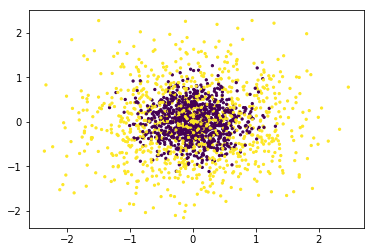

In [25]:
f,l=kolko_w_kolku()
rysoj_dane(f,l)

In [26]:
#teraz sproboje z tego zrobic jakis dataset

In [27]:
#f,l=kolko_w_kolku()

In [28]:
#dataset = tf.data.Dataset.from_tensor_slices((f,l))

In [29]:
#BATCH_SIZE=100
#zbachowany=dataset.shuffle(1000).repeat().batch(BATCH_SIZE)

In [30]:
#to jest dataset zaraz zastanowie sie jak go zapisac do pliku i z tego pliku odczytac a teraz jak go czytac?

In [31]:
#iterator = zbachowany.make_one_shot_iterator()

In [32]:
#f,l=iterator.get_next()

In [73]:
#with tf.Session() as sess:
#    for i in range(100):
#        sess.run(l)
    

In [83]:
#wrap_float64([5.55,6.85]) #swietnie

In [52]:
def wrap_int64(value):
    """lista intow musi wlesc"""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))
def wrap_float64(value):
    """lista floatow musi wlesc"""
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

"""
Teraz ta funkcja wpisz jest ważna. ona bierze po jednym przypadku testowym, 
( to jest ta petla for i in range()) i go zapisuje. trzeba zwracac 
uwage na to jakiego typu sa zapisywane rzeczy. mozna oczywiscie zrobic slownik
data dluzszym, jesli to w jakis sposob ulatwi nam myslenie o naszych danych. 
Bo te nasze dane to bedzie slownik list, w ktorych to listach rzeczy maja 
juz taki sam typ, a klucze to beda jakies opisowe nazwy.
np 

data={
'czteroped_lewej_nogi_czy_cos': wrap_float64(cztero), # gdzie cztero to jest tensor floatow o shape (4,)
# reszta rzeczy

}

Jak byscie chcieli jako wartosci miec stringi to musicie pomyslec jak zrobic wrapy dla stringow. oczywiscie
nie znajdziecie zadnej dokumentacji. 





"""


def wpisz(out_path):
    """tworzy ten nasz dataset w pliku out_path """
    f,l=kolko_w_kolku() #mozna zmienic jak sie podoba
    with tf.python_io.TFRecordWriter(out_path) as writer:
        for i in range(len(f)):
            feature=f[i]
            label=l[i]
            data = {
                 'feature': wrap_float64(feature),
                'label': wrap_int64([label])
                    }
            # Wrap the data as TensorFlow Features.
            feature = tf.train.Features(feature=data)

            # Wrap again as a TensorFlow Example.
            example = tf.train.Example(features=feature)

            # Serialize the data.
            serialized = example.SerializeToString()

            # Write the serialized data to the TFRecords file.
            writer.write(serialized)
    
        
    

In [53]:
wpisz("dane_treningowe")

In [84]:
"""
Teraz funkcja wczytujaca ten nasz dataset. 
Z ciekawych rzeczy to zwroccie uwage, ze jak wczytamy do binarnych nasz dataset to 
tracimy informacje o tym jakiego typu sa dane. Z tego powodu trzeba to ponownie dookreslac
co jest strasznie glupie. 

czyli to jest ten slownik features w ponizszej funkcji  ktory musi byc zgodny z slownikiem data z funkcji wpisz

"""



def wczytaj_dataset(file_path):
    """Wczytuje dataset po prostu jeszcze nie robi z nim nic szczegolnego"""
    def parse(serialized):
        """ta funkcja pomocnicza dla jednego przypadku ktory nie pamieta jakiego jest typu mu przypomina
        smutne ze trzeba takie rzeczy pisac"""
        # Define a dict with the data-names and types we expect to
        # find in the TFRecords file.
        # It is a bit awkward that this needs to be specified again,
        # because it could have been written in the header of the
        # TFRecords file instead.
        features = \
            {
                'feature': tf.FixedLenFeature([2], tf.float32),#z jakiegos powodu to jest float32, nie wiem czemu
                'label': tf.FixedLenFeature([], tf.int64)
            }

        # Parse the serialized data so we get a dict with our data.
        parsed_example = tf.parse_single_example(serialized=serialized,
                                                 features=features)
        return parsed_example['feature'], parsed_example['label']
    
    dataset = tf.data.TFRecordDataset(file_path)
    dataset = dataset.map(parse)
    return dataset

In [81]:
dataset=wczytaj_dataset("dane_treningowe")

In [82]:
BATCH_SIZE=3
zbachowany=dataset.shuffle(1000).repeat().batch(BATCH_SIZE)
iterator = zbachowany.make_one_shot_iterator()
f,l=iterator.get_next()
with tf.Session() as sess:
    for i in range(10):
        print(sess.run(l))
    

[1 1 0]
[0 1 1]
[0 0 0]
[1 0 0]
[1 0 0]
[0 1 1]
[1 1 1]
[0 1 1]
[0 1 0]
[0 0 0]
